This is test a conducted on the third skill based schedule provided by the KTP associate which consists of 24 engineers and 38 jobs.

10 percent of the jobs (4 jobs) assigned were randomly removed and reassigned using the scheduling algorithm. The results of the test is shown as a bar graph in the end.

Please note that if the program is run again, the results generated may be different from the one displayed right now and in the dissertation report as the jobs are removed randomly.

In [1]:
#Importing Necessary Libraries
import numpy as np
import re
import sys
import random
import pandas as pd
import math
from numpy import nan
from math import nan, isnan
import requests
import json
import sys
import geocoder as gc
from geopy import distance 
from geopy.geocoders import Nominatim

#Defining Class Objects
class Engineers:
    def __init__(self,eid,location,skill,schedule,time):
        self.eid = eid
        self.location = location
        self.schedule =schedule
        self.skill = skill
        self.time = time
        
    def print(self):
        print("------------------------------------")
        print("E.ID =", self.eid)
        print("Schedule =", self.schedule)
        print("Total Time =", self.time)
    
class Jobs:
    
    def __init__(self,jid,location,skill):
        self.jid = jid
        self.location = location
        self.skill = skill
        
df = pd.read_excel('schedule_j158_e24.xlsx')

In [2]:
df

,Engineer ID,Postcode,Engineer Skills,Number of work orders,drive for,do job,at postcode,for,drive for.1,do job.1,...,at postcode.97,for.97,drive for.98,do job.98,at postcode.98,for.98,drive for.99,do job.99,at postcode.99,for.99
0,3591,BS14 9LD,"bafe qualified,building fabric,evac chair,vinyl",1,3.47h,#74564281(building fabric),PL11 2JW,1.0h,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3618,PL27 7PU,building fabric,1,3.4h,#74564260(building fabric),BS22 6BL,1.0h,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3626,TA6 4UR,"building fabric,nft,small works",4,0.06h,#74564264(building fabric),TA6 4AB,1.0h,3.59h,#74564462(building fabric),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3630,BS34 7NR,"bafe qualified,building fabric,checkout and ca...",2,0.28h,#74564274(building fabric),BS20 7GF,1.0h,1.12h,#74564268(building fabric),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3787,EX15 3EF,"building fabric,nft,small works",5,1.66h,#74564277(building fabric),BS4 3QU,1.0h,2.2h,#74564287(building fabric),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3801,PL6 5PD,"bafe qualified,building fabric,vinyl",5,3.45h,#74564272(building fabric),BA1 2DR,1.0h,1.52h,#74564261(building fabric),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3821,BS37 8TY,"electrical,hvac,plumbing",1,4.64h,#74440555(plumbing),TR7 1NF,1.0h,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4176,BS37 4LG,lighting,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4399,TA5 2RH,"electrical,hvac,plumbing",2,1.4h,#74495284(plumbing),EX31 3NH,1.0h,2.19h,#74444011(plumbing),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4403,PL21 0FB,"electrical,hvac,plumbing",0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Preprocessing:

a = df["Engineer ID"].tolist()
b = df["Postcode"].tolist()
c = df['Engineer Skills'].tolist()

d = []
for i in c:
    x = re.split("\,", i)
    d.append(x)

e = df['Number of work orders'].tolist()

cols = list(df.columns)
schedules = df[cols[5:24]]

s = [] #get schedules
for i, row in schedules.iterrows():
    x = []
    for j in range(len(row)):
        if(re.search("^#",str(row[j]))):
            x.append(row[j])
    s.append(x)

g = []
for i in range(len(s)):
    f = []
    for j in range(len(s[i])):
        x = re.findall('#(.*)\(',str(s[i][j]))
        f.append(x[0])
    g.append(f)

u = []
for i in range(len(s)):
    v = []
    for j in range(len(s[i])):
        x = re.findall('\((.*)\)',str(s[i][j]))
        v.append(x[0])
    u.append(v)

ls = [] #get schedules
for i, row in schedules.iterrows():
    x = []
    for j in range(len(row)):
        if(re.search("^[A-Z]",str(row[j]))):
            x.append(row[j])
    ls.append(x)

J = []
for i in range(len(g)):
    for j in range(len(g[i])):
        if not g[i]:
            continue          
        else:
            J.append(Jobs(g[i][j],ls[i][j],u[i][j]))

E = []
for i in range(len(df)):
    E.append(Engineers(a[i],b[i],d[i],g[i],0))

data = {
    "jobs":J, "engg":E
}

In [4]:
#Function to get qualified engineers
def get_qualified(data,job):
    qualified = []
    for i in E:
        if(get_job(job,J).skill in i.skill):
            qualified.append(i)
    return qualified

#Function which returns job details from job id
def get_job(key,arr):
    for i in arr:
        if(i.jid == key):
            return i
    return None

#OSRM TSP function:
def osrm_tsp(data): 
    lat = []
    long = []
    for i in range(len(data)):
        lats, longs = None, None 
        g = gc.arcgis(data[i])
        if g is None:
            continue
        else:
            lats, longs = g.latlng
            lat.append(lats)
            long.append(longs)
    json_data = []
    lurl = ""
    for i in range(len(lat)):
        lurl += f'{long[i]},{lat[i]};'
    url = 'http://127.0.0.1:5000/trip/v1/driving/'
    url += lurl[:-1]
    url += '?source=first'
    r = requests.get(url)
    json_data.append(r.json())
    for i in range(len(json_data[0]['waypoints'])):
        if(i==0):
            continue
        json_data[0]['waypoints'][i].update({"JID":data[i]})
    json_data[0]['waypoints'].sort(key = lambda x:x["waypoint_index"])
    schedule = []
    for i in json_data[0]['waypoints']:
        if('JID' in i):
            schedule.append(i['JID'])
    outputs = {
        "Duration": json_data[0]['trips'][0]['duration'],
        "Schedule": schedule
    }
    return outputs

#Shift Operator
def shift_op(data,job,qualified):
    print("The Engineers qualified for Job J :")
    qe = [x+1 for x in qualified]
    print(qe)
    for i in qualified:
        print("\nShifting in Engineer: {}:".format(data["engg"][i].eid))
        arr = []
        for j in range(len(data["engg"][i].schedule)):
            arr.append(get_job(data["engg"][i].schedule[j],data["jobs"]))
        arr.append(job)
        maps = calculate_time_tsp(arr,data["engg"][i])
        time = maps["Duration"]
        print("\nTotal Time Required : {} \n".format(time))
        if( time <= 800 and time > 0):
            data["jobs"].append(job)
            print("Job J Assigned Successfully \n")
            data["engg"][i].schedule = []
            for l in maps["Schedule"]:
                data["engg"][i].schedule.append(l)
            return data
        print("Shifting Failed \n")
    return -1

#Task Move Operator
def task_move_op_tsp(data,job,qualified):
    print("The Engineers qualified for Job N :")
    qe = [x+1 for x in qualified]
    print(qe)
    for i in qualified:
        print("\nTask Moving in Engineer: {}".format(data["engg"][i].eid))
        for j in range(len(data["engg"][i].schedule)):
            arr = []
            for k in range(len(data["engg"][i].schedule)):
                if(k==j):
                    continue
                arr.append(get_job(data["engg"][i].schedule[k],data["jobs"]))
            arr.append(job)
            maps = calculate_time_tsp(arr,data["engg"][i])
            time = maps["Duration"]
            print("Total Time Required : {} \n".format(time))
            if( time <= 800 and time > 0):
                print("Assigning Task Moved Job to another Engineer :\n")
                job_1 = get_job(data["engg"][i].schedule[j],data["jobs"])
                qualified_1 = get_qualified(data,job_1)
                print("The Engineers qualified for the moved Job :\n")
                qqe = [x+1 for x in qualified_1]
                print(qqe)
                print("\n")
                for l in qualified_1:
                    if(i!=l):
                        print("Attempting to assign job to Engineer {}:\n".format(data["engg"][l].eid))
                        arr_1 = []
                        for n in range(len(data["engg"][l].schedule)):
                            arr_1.append(get_job(data["engg"][l].schedule[n],data["jobs"]))
                        arr_1.append(job_1)
                        maps_1 = calculate_time_tsp(arr_1,data["engg"][l])
                        time_1 = maps_1["Duration"]
                        print("Total Time Required : {} \n".format(time_1))
                        if( time_1 <= 800 and time_1 > 0):
                            data["engg"][i].schedule = maps["Schedule"]
                            data["engg"][l].schedule = maps_1["Schedule"]
                            data["jobs"].append(job)
                            print("Job N Assigned Successfully\n")
                            return data 
                print("Not Possible \n")
        print("Task Move Failed \n")
    return -1

In [5]:
#Calulating Total Time of Schedules
for i in data["engg"]:
    if not i.schedule:
        continue
    addresses = [i.location]
    for j in i.schedule:
        addresses.append(get_job(j,data["jobs"]).location)
    x = osrm_tsp(addresses)
    i.time = x["Duration"]/60

In [6]:
for i in E:
    i.print()

------------------------------------
E.ID = 3591
Schedule = ['74564281']
Total Time = 313.56166666666667
------------------------------------
E.ID = 3618
Schedule = ['74564260']
Total Time = 299.27333333333337
------------------------------------
E.ID = 3626
Schedule = ['74564264', '74564462', '74564276', '74564270']
Total Time = 423.52333333333337
------------------------------------
E.ID = 3630
Schedule = ['74564274', '74564268']
Total Time = 135.80166666666668
------------------------------------
E.ID = 3787
Schedule = ['74564277', '74564287', '74564266', '74564466', '74564764']
Total Time = 481.955
------------------------------------
E.ID = 3801
Schedule = ['74564272', '74564261', '74564284', '74564265', '74564774']
Total Time = 362.1066666666667
------------------------------------
E.ID = 3821
Schedule = ['74440555']
Total Time = 398.27833333333336
------------------------------------
E.ID = 4176
Schedule = []
Total Time = 0
------------------------------------
E.ID = 4399
Schedu

In [7]:
#Total time of each schedule
atime = []
for i in data["engg"]:
    atime.append(i.time)

In [8]:
#Choosing 4 Random Jobs from schedule
rj = []
for i in range(15):
    x = random.choice(J)
    rj.append(x.jid)
p = set(rj)
q = list(p)
a = q[0:4]

In [9]:
# Function that removes Jobs from schedule
def job_remove(rj):
    for i in data["engg"]:
        z = i.schedule
        for j in z:
            addresses = []
            if(j in rj):
                i.schedule.remove(j)
                if(not i.schedule):
                    continue
                else:
                    addresses = [i.location]
                    for k in i.schedule:
                        addresses.append(get_job(k,data["jobs"]).location)
                    x = osrm_tsp(addresses)
                    i.time = x["Duration"]/60

In [10]:
job_remove(a)

In [11]:
#OSRM TSP Funtion which returns job IDs
def osrm_tsp_v2(eng,job):
    lat = []
    long = []
    z = []
    for m in eng.schedule:
        z.append(m)
    z.append(job)
    addresses = [eng.location]
    for j in eng.schedule:
        addresses.append(get_job(j,data["jobs"]).location)
    addresses.append(get_job(job,data["jobs"]).location)
    for i in range(len(addresses)):
        lats, longs = None, None 
        g = gc.arcgis(addresses[i])
        if g is None:
            print("Error")
            continue
        else:
            lats, longs = g.latlng
            lat.append(lats)
            long.append(longs)
    json_data = []
    lurl = ""
    for i in range(len(lat)):
        lurl += f'{long[i]},{lat[i]};'
    url = 'http://127.0.0.1:5000/trip/v1/driving/'
    url += lurl[:-1]
    url += '?source=first'
    r = requests.get(url)
    json_data.append(r.json())
    for i in range(len(json_data[0]['waypoints'])):
        if(i==0):
            continue
        json_data[0]['waypoints'][i].update({"JID":z[i-1]})
    json_data[0]['waypoints'].sort(key = lambda x:x["waypoint_index"])
    schedule = []
    for i in json_data[0]['waypoints']:
        if('JID' in i):
            schedule.append(i['JID'])
    outputs = {
        "Duration": json_data[0]['trips'][0]['duration'],
        "Schedule": schedule
    }
    return outputs

In [12]:
# Function which reassigns jobs back to the schedule
def job_add(rj):
    for i in rj:
        addresses = []
        x = sys.float_info.max
        y = 0
        s = []
        q = get_qualified(data,i)
        for j in q:
            if(len(j.schedule)==6):
                continue
            if(not j.schedule):
                continue
            time = 0
            ans = osrm_tsp_v2(j,i)
            time = ans["Duration"]/60
            if(time < x):
                x = time
                y = j.eid
                s = ans["Schedule"]
        for l in data["engg"]:
            if(l.eid==y):
                l.time = x
                l.schedule = s

In [13]:
for i in E:
    i.print()

------------------------------------
E.ID = 3591
Schedule = ['74564281']
Total Time = 313.56166666666667
------------------------------------
E.ID = 3618
Schedule = ['74564260']
Total Time = 299.27333333333337
------------------------------------
E.ID = 3626
Schedule = ['74564264', '74564462', '74564276', '74564270']
Total Time = 423.52333333333337
------------------------------------
E.ID = 3630
Schedule = ['74564274']
Total Time = 41.73833333333334
------------------------------------
E.ID = 3787
Schedule = ['74564277', '74564287', '74564266', '74564466', '74564764']
Total Time = 481.955
------------------------------------
E.ID = 3801
Schedule = ['74564272', '74564261', '74564284', '74564265', '74564774']
Total Time = 362.1066666666667
------------------------------------
E.ID = 3821
Schedule = ['74440555']
Total Time = 398.27833333333336
------------------------------------
E.ID = 4176
Schedule = []
Total Time = 0
------------------------------------
E.ID = 4399
Schedule = ['744952

In [14]:
job_add(a)

In [15]:
#Total time of schedules after reinsertion
ctime = []
for i in data["engg"]:
    ctime.append(i.time)

In [16]:
atime

[313.56166666666667,
 299.27333333333337,
 423.52333333333337,
 135.80166666666668,
 481.955,
 362.1066666666667,
 398.27833333333336,
 0,
 249.31666666666666,
 0,
 356.615,
 275.025,
 245.93666666666667,
 0,
 188.61333333333332,
 245.75833333333333,
 0,
 268.5366666666667,
 0,
 299.5466666666667,
 584.4333333333333,
 42.09666666666667,
 0,
 353.89166666666665]

In [17]:
ctime

[313.56166666666667,
 299.27333333333337,
 423.52333333333337,
 135.80166666666668,
 481.955,
 362.1066666666667,
 398.27833333333336,
 0,
 249.31666666666666,
 0,
 356.615,
 275.025,
 245.93666666666667,
 0,
 188.61333333333332,
 245.75833333333333,
 0,
 448.1166666666667,
 0,
 102.53666666666666,
 355.5866666666667,
 135.9,
 0,
 353.89166666666665]

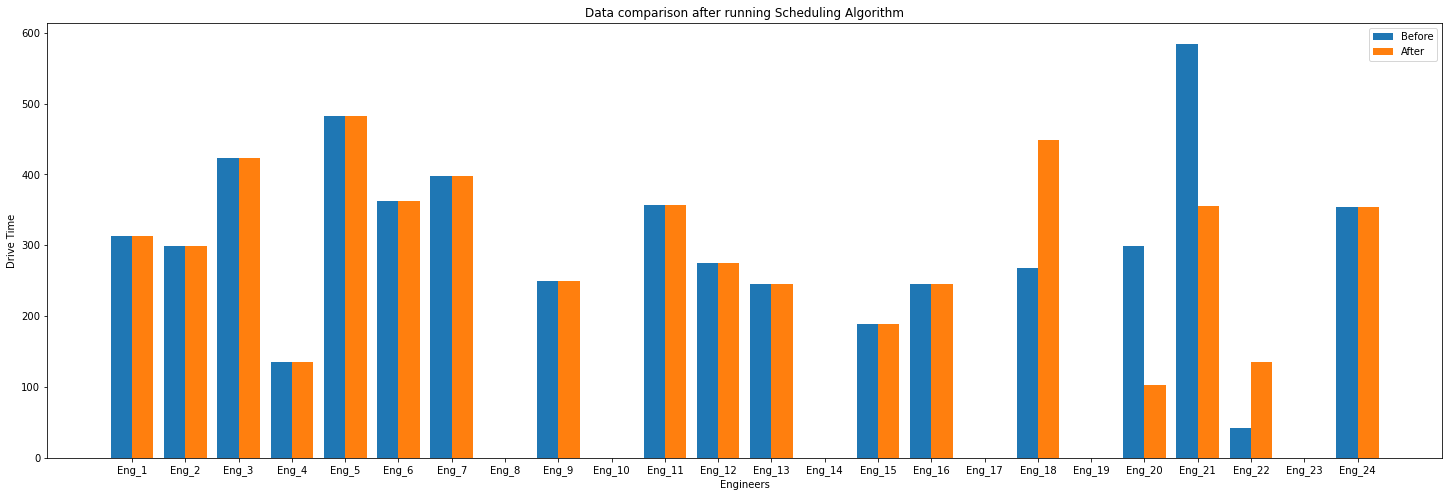

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Eng_1','Eng_2','Eng_3','Eng_4','Eng_5','Eng_6','Eng_7','Eng_8','Eng_9','Eng_10','Eng_11','Eng_12','Eng_13','Eng_14','Eng_15','Eng_16','Eng_17','Eng_18','Eng_19','Eng_20','Eng_21','Eng_22','Eng_23','Eng_24']
plt.figure(figsize=(25,8))  
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, atime, 0.4, label = 'Before')
plt.bar(X_axis + 0.2, ctime, 0.4, label = 'After') 
plt.xticks(X_axis, X)
plt.xlabel("Engineers")
plt.ylabel("Drive Time")
plt.title("Data comparison after running Scheduling Algorithm")
plt.legend() 
plt.show()

In [19]:
#Total Drive Time Before
adt = 0
for i in atime:
    adt+=i

In [20]:
#Total Drive Time After
bdt = 0
for i in ctime:
    bdt+=i

In [21]:
adt

5524.2699999999995

In [22]:
bdt

5371.796666666666